In [1]:
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from MC import monteCarlo
from PSR import sd_sr, prob_sharpe, sr

# Quantitative Finance and Portfolio Management

## 1. Data Mining and Exploratory Analysis
Creation of an equally weighted, diversified portfolio and analysis on its daily returns.

<Axes: title={'center': 'Asset Correlation Heatmap'}, xlabel='Ticker', ylabel='Ticker'>

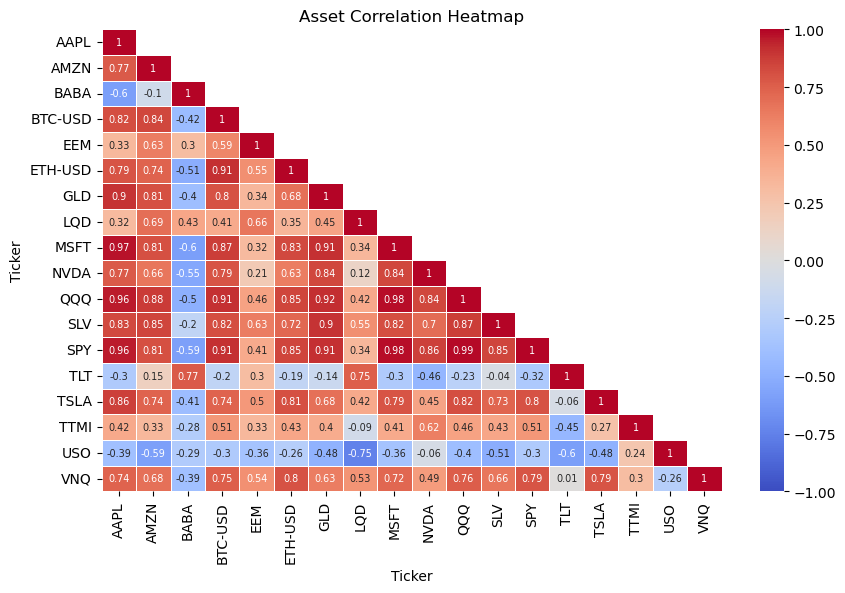

In [2]:
tickers = ['AAPL','AMZN','MSFT','NVDA','TSLA','BABA','TTMI','SPY','QQQ','VNQ','EEM','TLT','LQD','GLD','SLV','USO','BTC-USD','ETH-USD']
data = yf.download(tickers,interval='1d',start='2018-01-01', progress=False)
df = pd.DataFrame(data)
df = df['Adj Close'].dropna(how='all')
corr = df.corr().round(decimals=2)
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)
plt.figure(figsize=(10,6))
plt.title('Asset Correlation Heatmap')
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, vmin=-1, vmax=1,mask=mask,annot_kws={'fontsize':'x-small'})

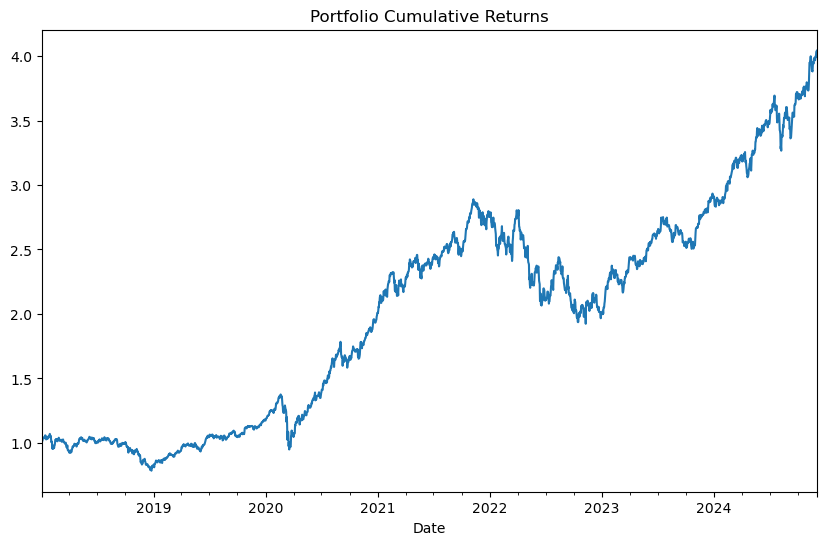

In [3]:
if not df.empty:
    returns = df.pct_change().dropna(how='all')
    #Equally weighted portfolio
    weight = [1/len(tickers)] * len(tickers)
    portfolio_returns = returns.dot(weight)
    cum_returns = (1 + portfolio_returns).cumprod()
cum_returns.plot(title="Portfolio Cumulative Returns", figsize=(10, 6));

Text(0, 0.5, 'Density')

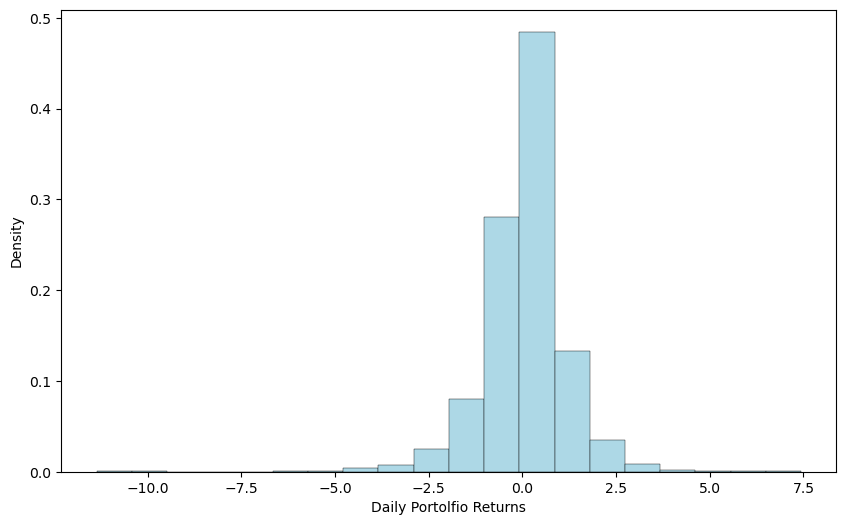

In [4]:
plt.figure(figsize=(10,6))
plt.hist(portfolio_returns*100, bins=20, color='lightblue', edgecolor='black', linewidth=0.3,density=True)
plt.xlabel('Daily Portolfio Returns')
plt.ylabel('Density')

### 1.1 Probalistic Sharpe Ratio
The Sharpe Ratio assumes IID and normally distributed returns. The Probabilistic Sharpe Ratio takes into account the higher order moments (skew
and kurtosis). It is used to compare with a benchmark Sharpe Ratio. This is an adjusted Sharpe Ratio using all data from 2018-01-01. 

In [5]:
cum_returns == cum_returns - 100
cum_returns = pd.DataFrame(cum_returns).dropna()
portfolio_returns = portfolio_returns.dropna()
bench_sr = 0
psr = prob_sharpe(bench_sr, portfolio_returns)
sr = sr(portfolio_returns)
print('PSR: ', psr, 'SR: ', sr.values[0])
print('Probability that the Sharpe Ratio is greater than the benchmark of:', bench_sr)

PSR:  [0.91512346] SR:  2.2591848639341676
Probability that the Sharpe Ratio is greater than the benchmark of: 0


## 2. Monte Carlo Simulation of Equally Weighted Portfolio

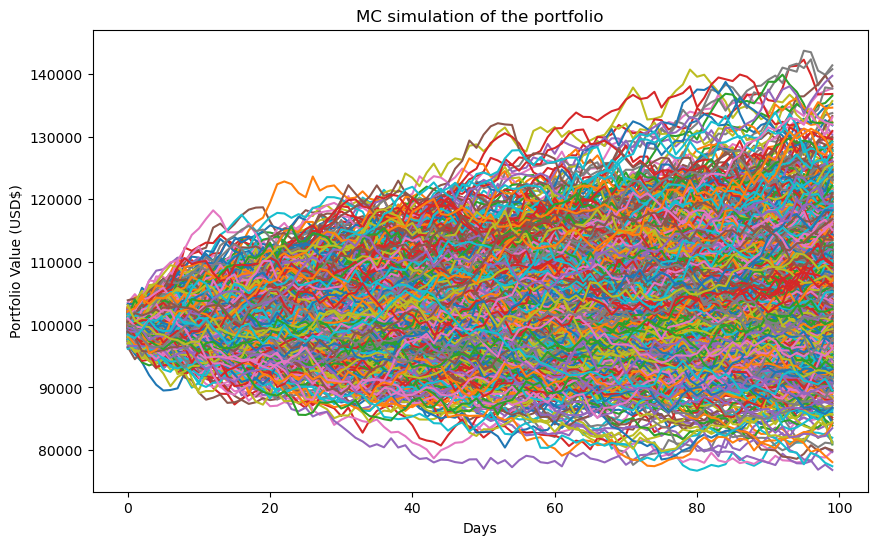

In [6]:
monteCarlo(returns, 1000, 100, 100000)